<a href="https://colab.research.google.com/github/FerminMendez/ModuleAI/blob/main/PokemonTypeClassification/DeployPokemonClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set up

In [30]:
import os
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Importamos librerios

In [31]:
import tensorflow as tf
from tensorflow import keras
import h5py
import numpy as np
from keras.models import load_model
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Cómo usarlo

Una vez tenemos un modelo h5 entrenado. Vamos a importarlo y elegir poner algunos pokemones en una carpeta para hacer las predicciones y ver los resultados.

Lista de imagenes:

In [32]:
# List of paths of images
prediction_dir="/content/gdrive/MyDrive/DataSetIA/PokemonTypeClassification/Models/prediction"
image_paths = [os.path.join(prediction_dir, 'pkm1.jpg'),
               os.path.join(prediction_dir, 'pkm2.jpg'),
               os.path.join(prediction_dir, 'pkm3.jpg'),
               # add more paths as needed
               ]

Importamos el modelo

In [33]:
models_directory="/content/gdrive/MyDrive/DataSetIA/PokemonTypeClassification/Models"
# Load the model
modelpath=os.path.join(prediction_dir,'modelv3.h5')
model = load_model(modelpath)


# Predicciones

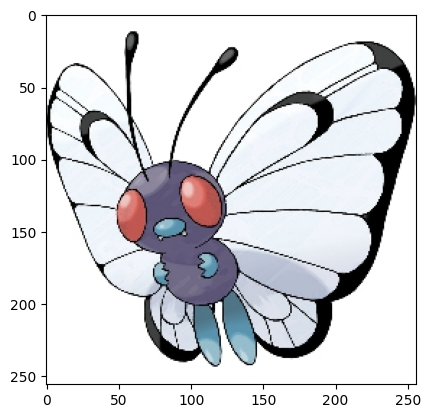

1/1 [==============================] - 0s 429ms/step
First predicted class: Bug, Percentage: 100.00%
Second predicted class: Water, Percentage: 0.00%
-------------------------------


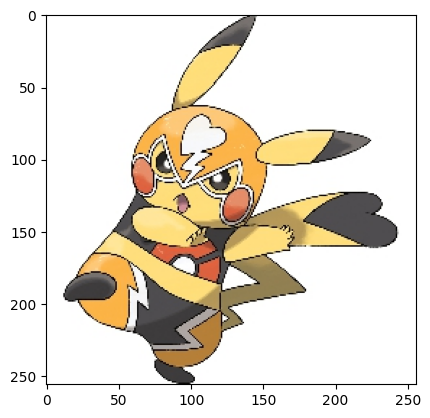

1/1 [==============================] - 0s 129ms/step
First predicted class: Electric, Percentage: 61.53%
Second predicted class: Bug, Percentage: 11.89%
-------------------------------


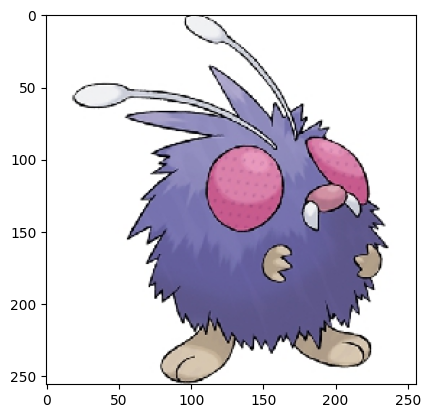

1/1 [==============================] - 0s 140ms/step
First predicted class: Bug, Percentage: 98.21%
Second predicted class: Electric, Percentage: 1.77%
-------------------------------


In [34]:
# Define the classes (if available)
classes = ['Bug', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire', 'Ghost', 'Grass', 'Ground', 'Ice', 'Normal', 'Poison', 'Psychic', 'Rock', 'Water']

# Preprocess images, make predictions, and display them
for img_path in image_paths:
    # Preprocess the image
    img = image.load_img(img_path, target_size=(100, 100))  # Adjust the target_size as per your model's input requirements
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)

    # Display the image
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.show()

     # Make predictions
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=-1)
    top_2 = np.argsort(predictions[0])[-2:]

    # Get the first and second predicted classes along with their percentages
    first_class = classes[top_2[1]]
    second_class = classes[top_2[0]]
    first_class_percent = predictions[0][top_2[1]] * 100
    second_class_percent = predictions[0][top_2[0]] * 100

    print(f"First predicted class: {first_class}, Percentage: {first_class_percent:.2f}%")
    print(f"Second predicted class: {second_class}, Percentage: {second_class_percent:.2f}%")
    print('-------------------------------')
